In [16]:
import librosa
from pydub import AudioSegment
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import glob
import numpy as np

def convert_audio_to_wav(file):
    audio = AudioSegment.from_file(file)
    file = file.replace('.flac', '.wav').replace('.mp3', '.wav')
    audio.export(file, format="wav")
    return file

music_files = glob.glob('/mnt/c/Users/777da/Desktop/music/*.flac') + glob.glob('/mnt/c/Users/777da/Desktop/music/*.mp3')

# MFCCs를 저장할 리스트
mfccs = []

# 각 음악 파일에 대해 MFCC를 추출
for file in music_files:
    file = convert_audio_to_wav(file)
    y, sr = librosa.load(file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfccs.append(mfcc)


In [23]:
import csv
import os
data = list(zip(music_files, mfccs))

# Specify the file path to save the data
file_path = os.path.join(os.getcwd(), 'file.csv')

# Write the data to the file
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"Data saved to {file_path}")


Data saved to /home/sesame/Music Classfier/file.csv


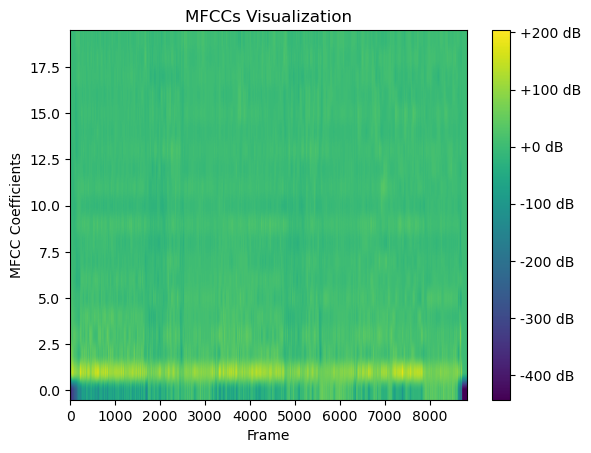

In [27]:
import matplotlib.pyplot as plt

plt.imshow(mfccs[0], cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs Visualization')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficients')
plt.show()


In [24]:

# 데이터를 훈련 세트와 테스트 세트로 분할
# 레이블을 생성 (여기서는 모든 레이블을 0으로 설정)
labels = np.zeros(len(mfccs))
X_train, X_test, y_train, y_test = train_test_split(mfccs, labels, test_size=0.2)

# 모델 생성
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 테스트 세트에서 유사도 계산
similarities = model.predict(X_test)

2024-03-27 08:02:36.974723: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 08:02:36.975381: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 08:02:36.975808: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 08:02:36.976509: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-27 08:02:36.976539: I tensorflow/core/common_runtime/gpu/gpu

AttributeError: 'list' object has no attribute 'shape'